In [ ]:
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt


In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
pd.get_dummies(insurance)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = insurance_one_hot.drop("charges" , axis=1)
Y = insurance_one_hot["charges"]

In [ ]:
X.head()


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split( X , Y , test_size = 0.2, random_state=42)
len(X) , len(X_train) , len(X_test)

(1338, 1070, 268)

In [ ]:
tf.random.set_seed(42)
insurance_model= tf.keras.Sequential ([
                                       tf.keras.layers.Dense(1)
])
insurance_model.compile (
    loss="mae" ,
    optimizer= tf.keras.optimizers.SGD() , 
    metrics=["mae"]
    )
insurance_model.fit (X_train , Y_train , epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 12936.5752 - mae: 12936.5752
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12091.7373 - mae: 12091.7373
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 11264.6709 - mae: 11264.6709
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 10507.7217 - mae: 10507.7217
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 9859.0068 - mae: 9859.0068
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9310.6611 - mae: 9310.6611
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8837.3008 - mae: 8837.3008
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 8451.8438 - mae: 8451.8438
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 8146.1074 - mae: 8146.1074
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7902.5376 - mae: 7

In [ ]:
insurance_model.evaluate (X_test , Y_test) 

9/9 [==============================] - 0s 2ms/step - loss: 7000.7295 - mae: 7000.7295


[7000.7294921875, 7000.7294921875]

In [ ]:
tf.random.set_seed(42)
insurance_model_2=tf.keras.Sequential  ([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss = tf.keras.losses.mae , 
                          optimizer = tf.keras.optimizers.Adam(lr = 0.01) , 
                          metrics= "mae"
                          )
insurance_model_2.fit(X_train , Y_train , epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


34/34 [==============================] - 1s 2ms/step - loss: 11434.4707 - mae: 11434.4707
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7504.8159 - mae: 7504.8159
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7289.5010 - mae: 7289.5010
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7064.4629 - mae: 7064.4629
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 6825.5918 - mae: 6825.5918
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 6569.6001 - mae: 6569.6001
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6442.8633 - mae: 6442.8633
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6254.7832 - mae: 6254.7832
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6121.5996 - mae: 6121.5996
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 5940.2451 - mae: 5940.2451
Epoch 11/

In [ ]:
insurance_model_2.evaluate(X_test , Y_test )

9/9 [==============================] - 0s 2ms/step - loss: 3167.3213 - mae: 3167.3213


[3167.3212890625, 3167.3212890625]

In [ ]:
insurance_model.evaluate(X_test , Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7000.7295 - mae: 7000.7295


[7000.7294921875, 7000.7294921875]

In [ ]:
tf.random.set_seed(42)
insurance_model_3 = tf.keras.Sequential ([
                                          tf.keras.layers.Dense(100),
                                          tf.keras.layers.Dense(10),
                                          tf.keras.layers.Dense(1)
])
insurance_model_3.compile(loss="mae",
                          optimizer=tf.keras.optimizers.Adam(lr=0.01) , 
                          metrics="mae")
history = insurance_model_3.fit(X_train, Y_train , epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


34/34 [==============================] - 0s 1ms/step - loss: 11434.4707 - mae: 11434.4707
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7504.8159 - mae: 7504.8159
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 7289.5010 - mae: 7289.5010
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7064.4629 - mae: 7064.4629
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 6825.5918 - mae: 6825.5918
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6569.6001 - mae: 6569.6001
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 6442.8633 - mae: 6442.8633
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 6254.7832 - mae: 6254.7832
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 6121.5996 - mae: 6121.5996
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 5940.2451 - mae: 5940.2451
Epoch 11/

In [ ]:
insurance_model_3.evaluate(X_test , Y_test )


9/9 [==============================] - 0s 2ms/step - loss: 3186.3911 - mae: 3186.3911


[3186.39111328125, 3186.39111328125]

In [ ]:
insurance_model_3.evaluate(X_test , Y_test ) , insurance_model_2.evaluate(X_test , Y_test ) , insurance_model.evaluate(X_test , Y_test )

9/9 [==============================] - 0s 2ms/step - loss: 7000.7295 - mae: 7000.7295


([3186.39111328125, 3186.39111328125],
 [3167.3212890625, 3167.3212890625],
 [7000.7294921875, 7000.7294921875])

Text(0.5, 0, 'epochs')

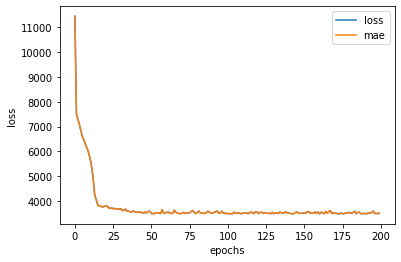

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

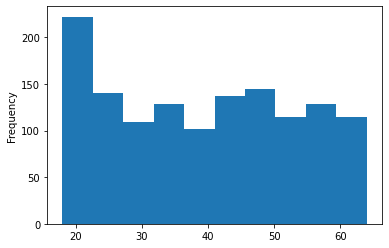

In [ ]:
X["age"].plot(kind="hist")


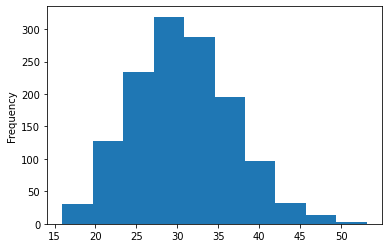

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
import tensorflow as tf 
import pandas as pd
import matplotlib.pyplot as plt
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer (
    (MinMaxScaler() , ["age" , "bmi" , "children" ]) ,
    (OneHotEncoder(handle_unknown="ignore") , ["sex" , "smoker" , "region"])
)
X= insurance.drop("charges" , axis=1)
Y= insurance["charges"]

X_train , X_test , Y_train , Y_test = train_test_split( X , Y , test_size = 0.2, random_state=42)
 
ct.fit (X_train)
 
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential ([
                                          tf.keras.layers.Dense(10), 
                                          tf.keras.layers.Dense(1)
])

insurance_model_4.compile(
    loss="mae" ,
    optimizer=tf.keras.optimizers.Adam(lr=0.01) , 
    metrics="mae"
)

insurance_model_4.fit(X_train_normal , Y_train , epochs=200)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13341.0107 - mae: 13341.0107
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13319.7217 - mae: 13319.7217
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 13272.4473 - mae: 13272.4473
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 13194.4570 - mae: 13194.4570
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 13084.4854 - mae: 13084.4854
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 12942.1787 - mae: 12942.1787
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 12767.9180 - mae: 12767.9180
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 12561.8711 - mae: 12561.8711
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 12324.1270 - mae: 12324.1270
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 12056.60

In [ ]:
insurance_model_4.evaluate( X_test_normal , Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3415.7615 - mae: 3415.7615


[3415.761474609375, 3415.761474609375]